<a href="https://colab.research.google.com/github/Bazinga97/ML_Projects/blob/main/Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Global Terrorism Database (GTD):

GTD's data collection  different institutions:
1. inkerton Global Intelligence Service (PGIS),  
2. Center for Terrorism and Intelligence Studies (CETIS),
3. Institute for the Study of Violent Groups (ISVG),
4. Study of terrorism and responses to terrorism (START) staff at the University of Maryland


Exclusion of Data of 1993 : Due to data loss prior to compilation by START : only 15 % reliability of data

Changes made to GTD:
Year 2014: target subtype and international/domestic variables removal of redundant variables and adjustments to weapon subtype categories.
Year 2015: Reclasification of regions and countries, use of formal names
Year 2016: Target subtype, weapon subtype, Geocoding for entire dataset
Year 2017: New Weapon: Chemical Weapon, Casuality information
Year 2018: target subtype variable, weapon type variable

 GTD defines terrorism as the intentional use of illegal force and violence by non-state actors to achieve political, economic, religious, or social goals through fear or intimidation, requiring intentional violence and non-state actors.

 Incidents must meet at least two of three additional criteria: having political, economic, religious, or social goals; intending to coerce or intimidate a larger audience; and occurring outside legitimate warfare activities.

 Incidents with uncertain categorization can be filtered using the "Doubt Terrorism Proper?" field, while unsuccessful attacks are included if attempted. Single incidents are determined by geographic and temporal continuity, with discontinuity resulting in separate incidents.



### Data set

1.  GTD ID system assigns a 12-digit numeric code to each incident, with the first 8 digits representing the date in "yyyymmdd" format and the last 4 digits indicating a sequential case number for the day. 0 indicates: unknown values ; Approximate dates are unclear  

In [18]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [19]:
#Load Dataset
df = pd.read_csv('Global Terrorism Data.csv', encoding='latin-1')

<ipython-input-19-135a5560d9e7>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Global Terrorism Data.csv', encoding='latin-1')


In [20]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [21]:

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df= df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['casualities']=df['Killed']+df['Wounded']
df_tmp = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181256 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181053 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

<ipython-input-21-b6ab70186bac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['casualities']=df['Killed']+df['Wounded']


In [22]:
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [23]:
# Remove all duplicate rows
df = df.drop_duplicates(keep=False)
df.replace('a', None)
len(df)
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              435
latitude         3885
longitude        3886
AttackType          0
Killed           9099
Wounded         14879
Target            523
Summary         56798
Group               0
Target_type         0
Weapon_type         0
Motive         119356
casualities     15415
dtype: int64

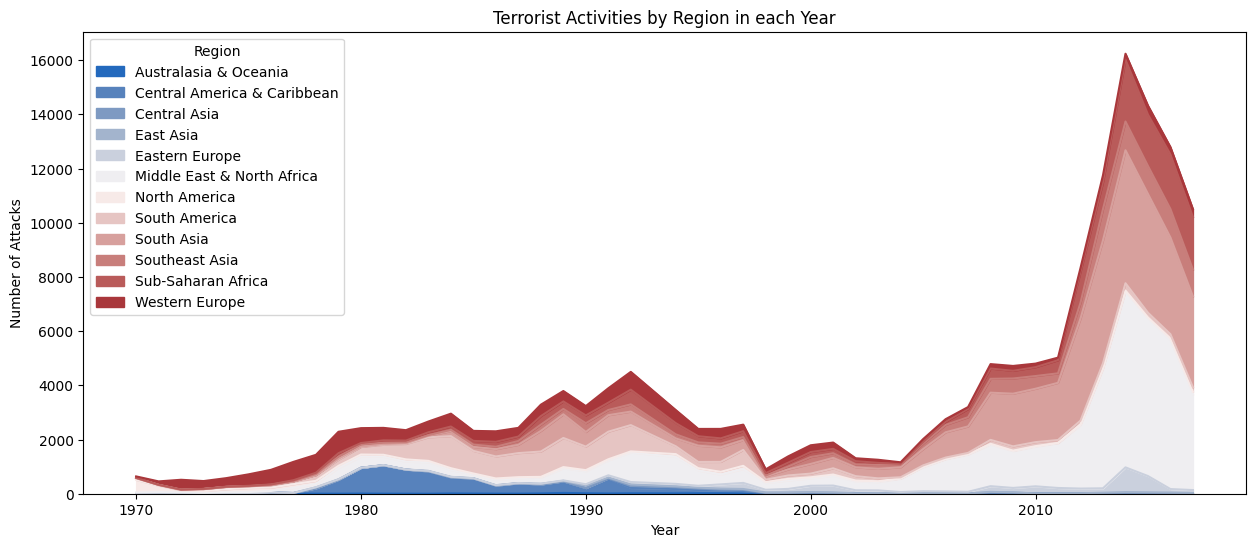

In [24]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6),colormap="vlag")
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

<ipython-input-25-ab2020439322>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Count', data=top_countries, palette='vlag')


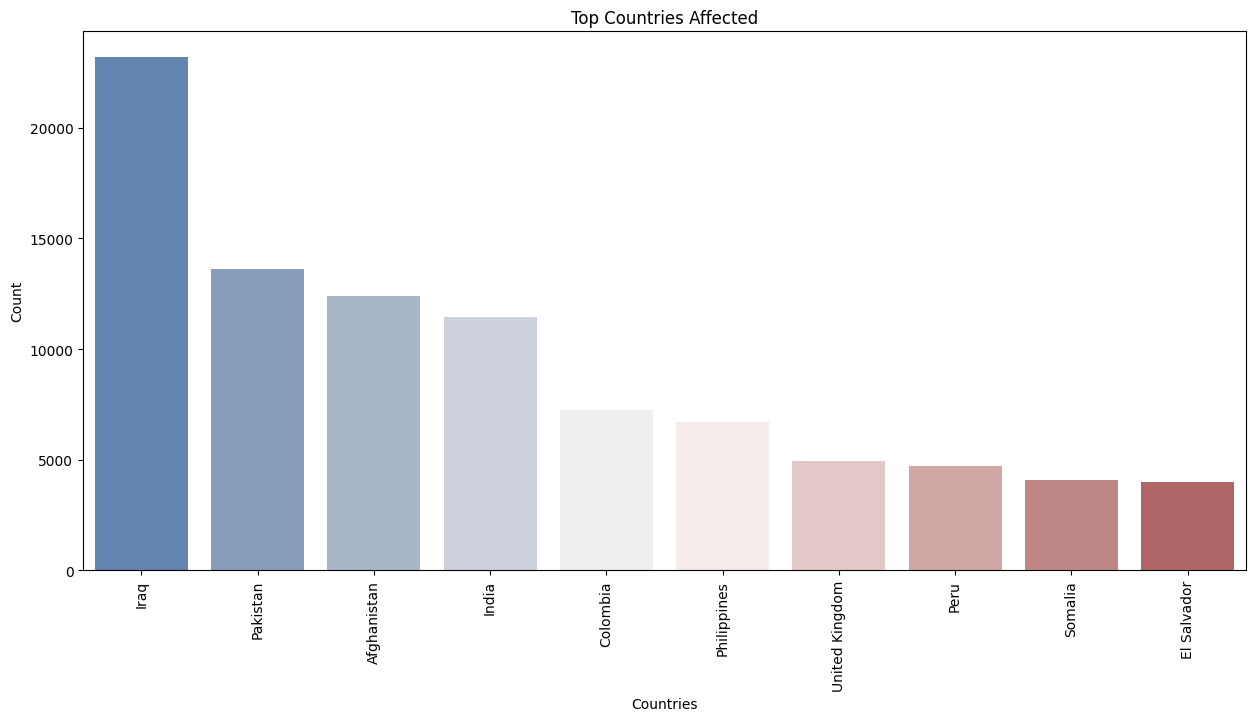

In [25]:
plt.subplots(figsize=(15,7))
top_countries = df['Country'].value_counts()[:10].to_frame().reset_index()
top_countries.columns = ['Country', 'Count']
sns.barplot(x='Country', y='Count', data=top_countries, palette='vlag')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

<ipython-input-27-543ff3bbc352>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weapon_type', y='Count', data=top_Weapons, palette='vlag')


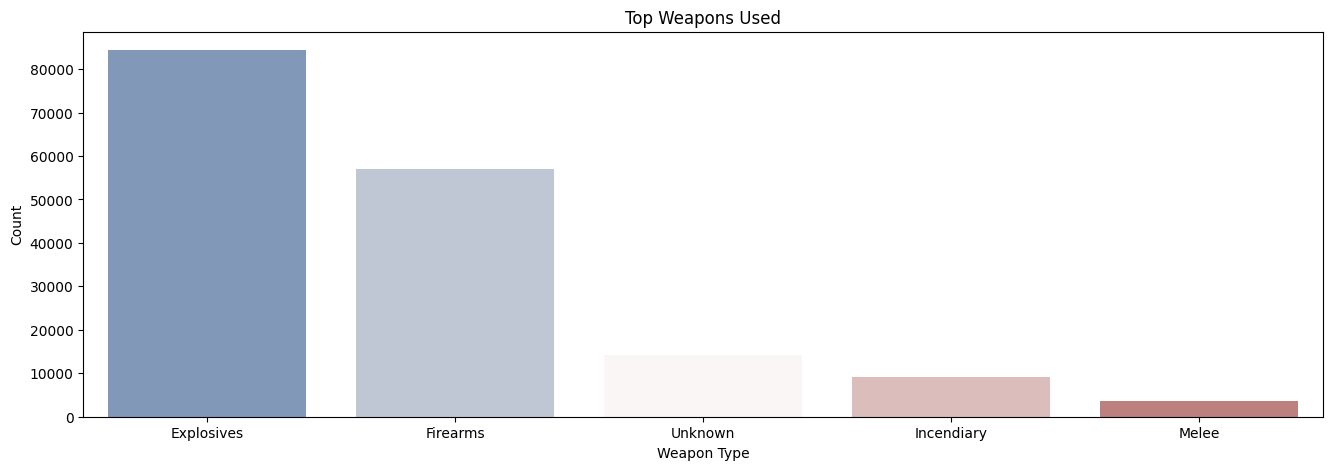

In [27]:
plt.subplots(figsize=(16,5))


top_Weapons = df['Weapon_type'].value_counts()[:5].to_frame().reset_index()
top_Weapons.columns = ['Weapon_type', 'Count']
sns.barplot(x='Weapon_type', y='Count', data=top_Weapons, palette='vlag')



plt.title('Top Weapons Used')
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.xticks()
plt.show()

<Axes: ylabel='count'>

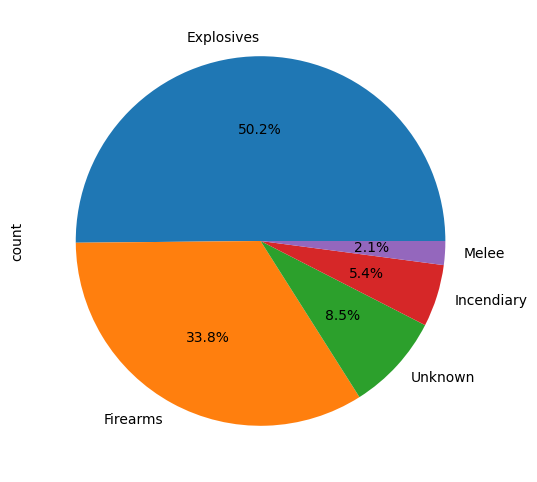

In [29]:
top5_Weapon=df['Weapon_type'].value_counts()[:5]
top5_Weapon.plot(kind='pie',autopct="%1.1f%%",figsize=(7,6))

Total Casualities

<ipython-input-31-1810c8b52ee3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_cas.casualities, y=count_cas.Country, palette= 'vlag',edgecolor=sns.color_palette('dark',10),orient='h')


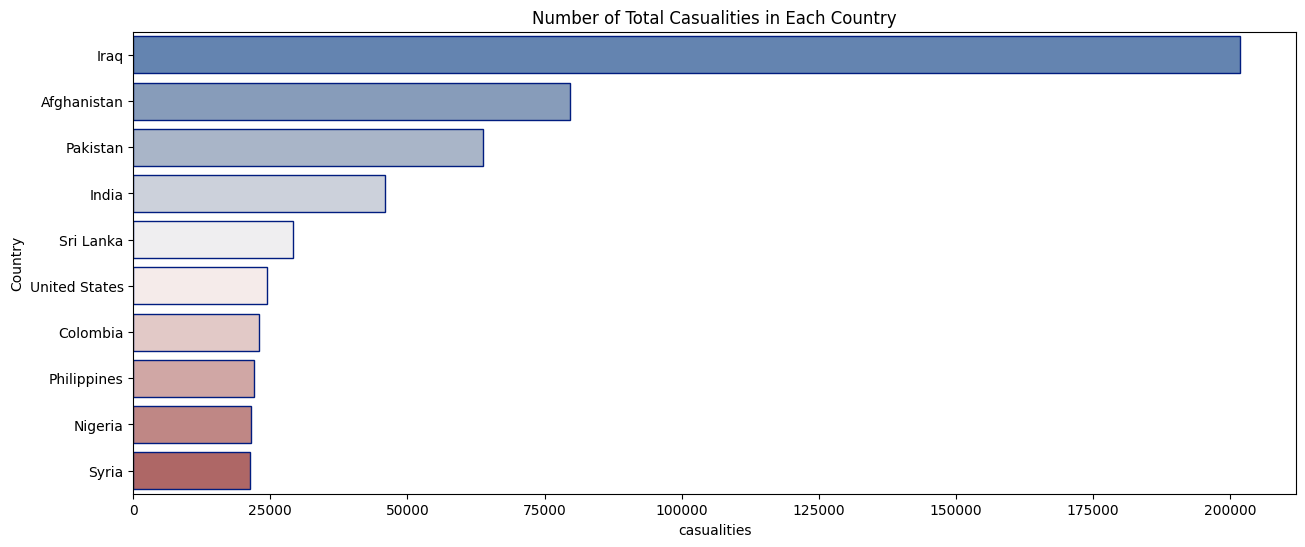

In [31]:
plt.subplots(figsize=(15,6))
count_cas = df.groupby('Country').casualities.sum().to_frame().reset_index().sort_values('casualities', ascending=False)[:10]
sns.barplot(x=count_cas.casualities, y=count_cas.Country, palette= 'vlag',edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Casualities in Each Country')
plt.show()

Each Region

<ipython-input-32-3bd2fb02adeb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_attacks['Total Attacks'], y=region_attacks.Region, palette='vlag', edgecolor=sns.color_palette('dark',10),orient='h')


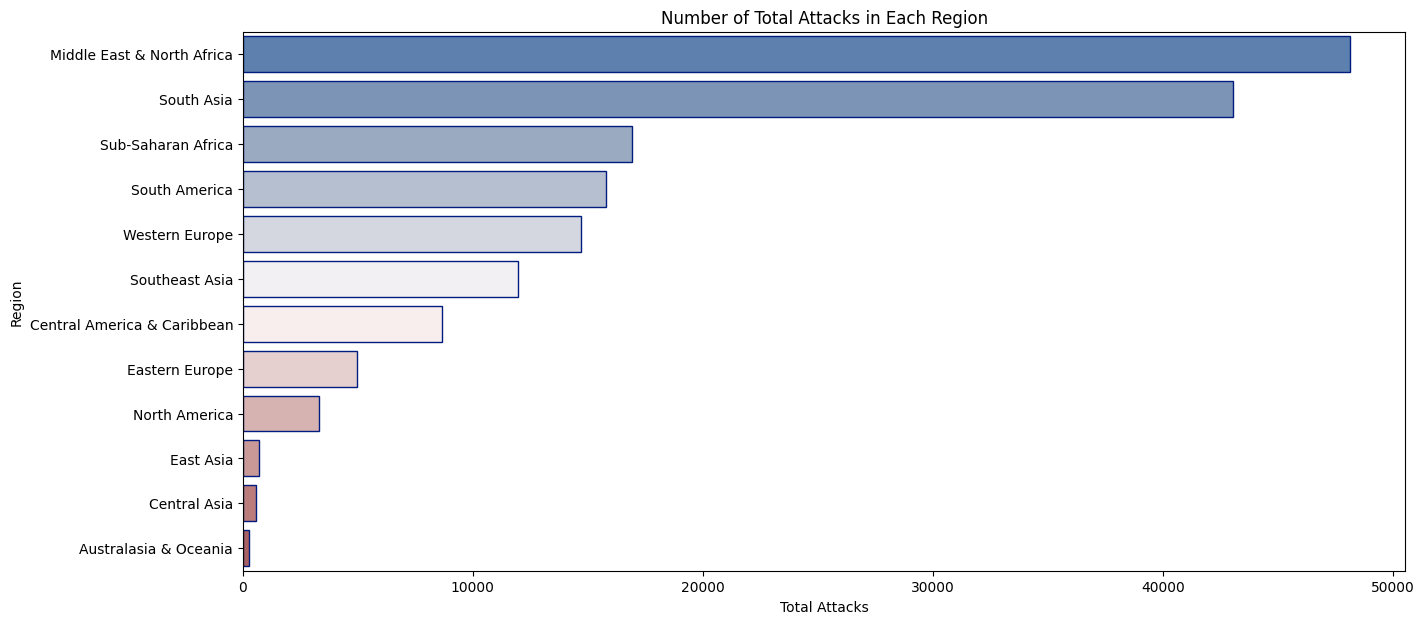

In [32]:
region_attacks =df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,7))
sns.barplot(x=region_attacks['Total Attacks'], y=region_attacks.Region, palette='vlag', edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Attacks in Each Region')
plt.show()

<Axes: ylabel='count'>

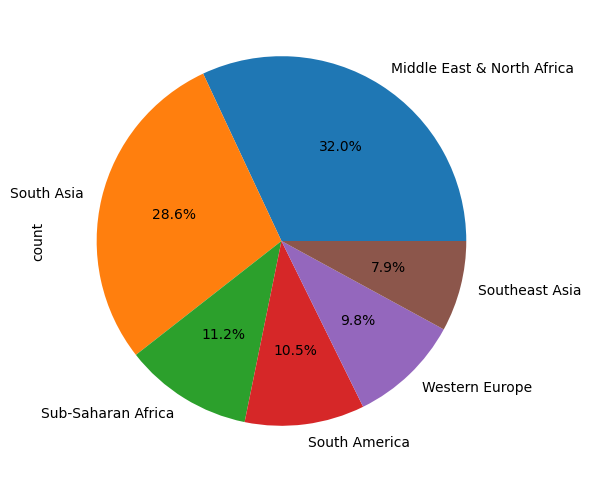

In [34]:
top5_Region=df['Region'].value_counts()[:6]
top5_Region.plot(kind='pie',autopct="%1.1f%%",figsize=(7,6))

In [38]:
Mid_Nor=df[df.Region == "Middle East & North Africa"]
Mid_Nor.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
95,1970,2,28,Jordan,Middle East & North Africa,Hebron,31.530243,35.094162,Armed Assault,NaN,NaN,Tourist Bus,NaN,Unknown,Tourists,Firearms,NaN,NaN
133,1970,3,14,Egypt,Middle East & North Africa,Alexandria,31.198056,29.919167,Bombing/Explosion,0.0,2.0,United Arab Airlines Flight Antonov 24 Acft,NaN,Unknown,Airports & Aircraft,Explosives,NaN,2.0
158,1970,3,29,Lebanon,Middle East & North Africa,Beirut,33.888523,35.503513,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Popular Front for the Liberation of Palestine ...,Government (Diplomatic),Explosives,NaN,0.0
195,1970,4,15,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Bombing/Explosion,0.0,0.0,US Embassy,NaN,Popular Front for the Liberation of Palestine ...,Government (Diplomatic),Explosives,NaN,0.0
226,1970,4,25,Turkey,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.0,0.0,EL AL Office,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,0.0


In [41]:
Mid_Nor.count()

Year           48143
Month          48143
Day            48143
Country        48143
Region         48143
city           48113
latitude       47278
longitude      47278
AttackType     48143
Killed         45989
Wounded        44738
Target         48010
Summary        39823
Group          48143
Target_type    48143
Weapon_type    48143
Motive         15213
casualities    44577
dtype: int64

In [46]:
import matplotlib.patches as mpatches

<ipython-input-50-32cd98626d63>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month',data=Mid_Nor,palette='vlag',edgecolor=sns.color_palette('dark',7))


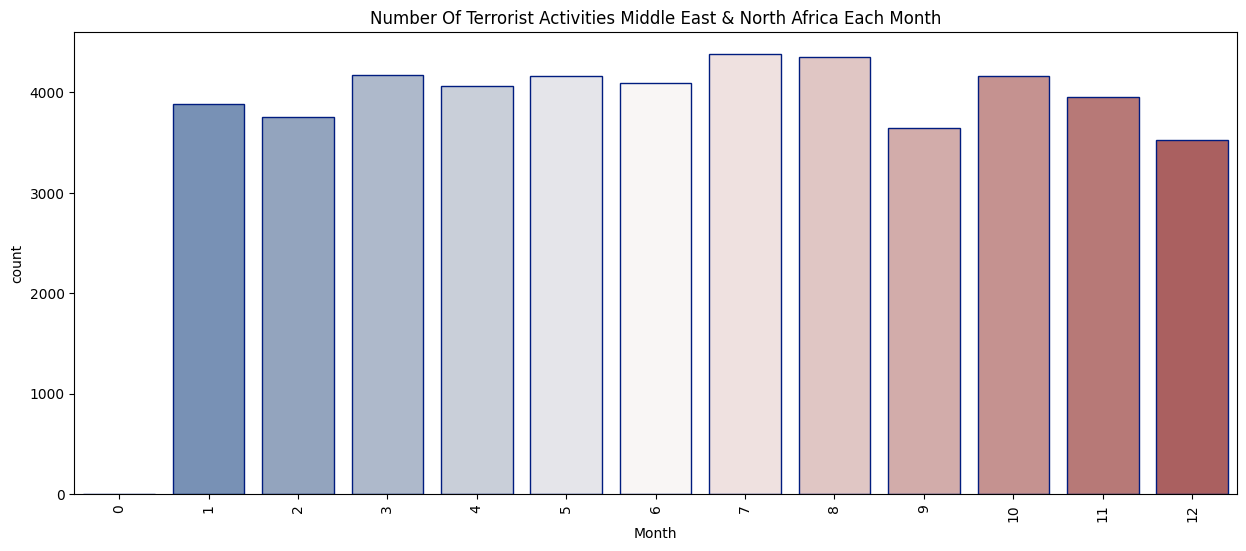

In [50]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Month',data=Mid_Nor,palette='vlag',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa Each Month')
plt.show()

<ipython-input-51-4f5741ada247>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day',data=Mid_Nor,palette='vlag',edgecolor=sns.color_palette('dark',7))


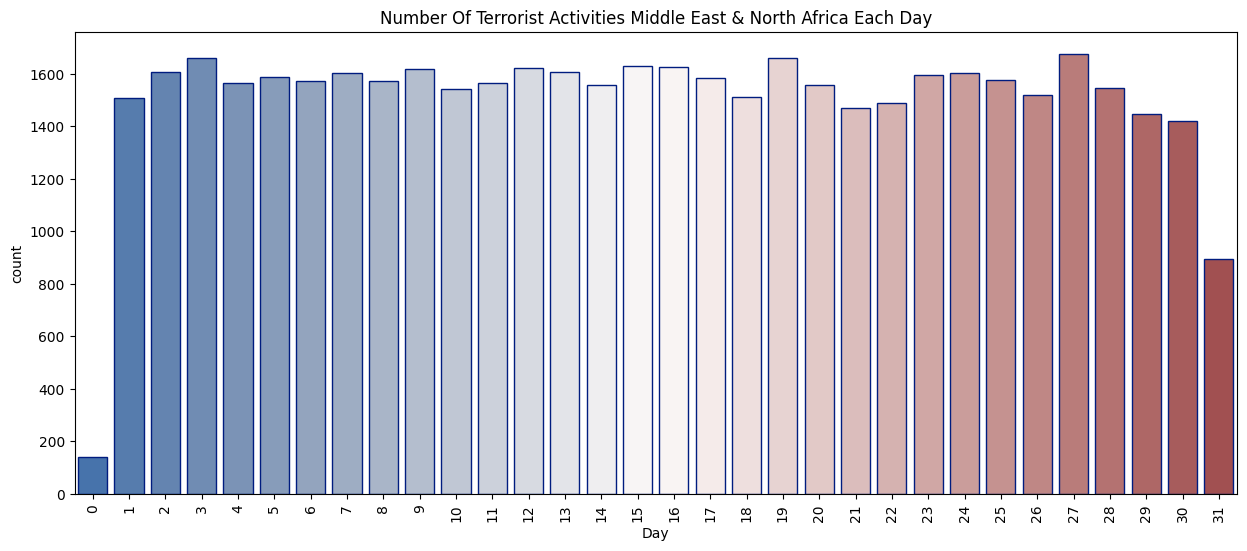

In [51]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Day',data=Mid_Nor,palette='vlag',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa Each Day')
plt.show()

<Axes: ylabel='count'>

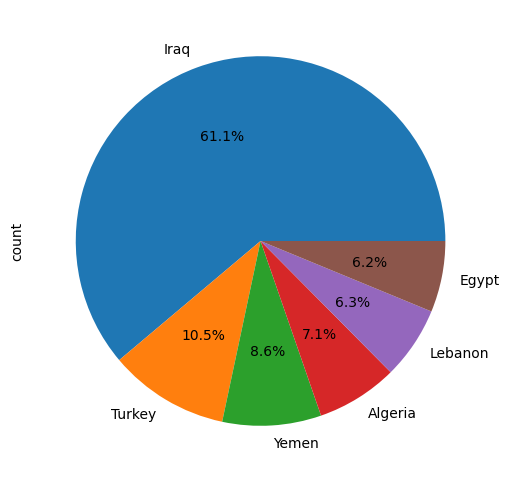

In [52]:
top5_country=Mid_Nor['Country'].value_counts()[:6]
top5_country.dropna()
top5_country.plot(kind='pie',autopct="%1.1f%%",figsize=(6,6))

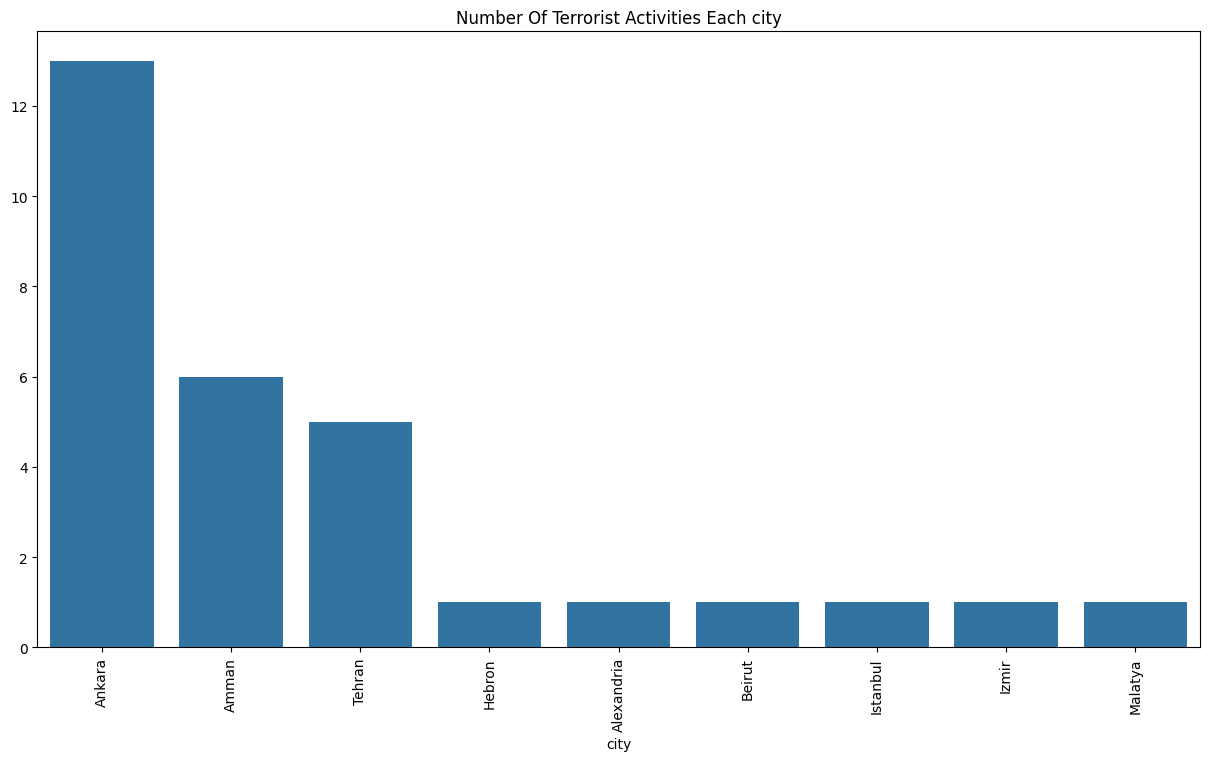

In [53]:
top_30_city=Mid_Nor.head(30)
plt.subplots(figsize=(15,8))
sns.barplot(x=top_30_city['city'].value_counts().index, y=top_30_city['city'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each city')
plt.show()

<Axes: ylabel='count'>

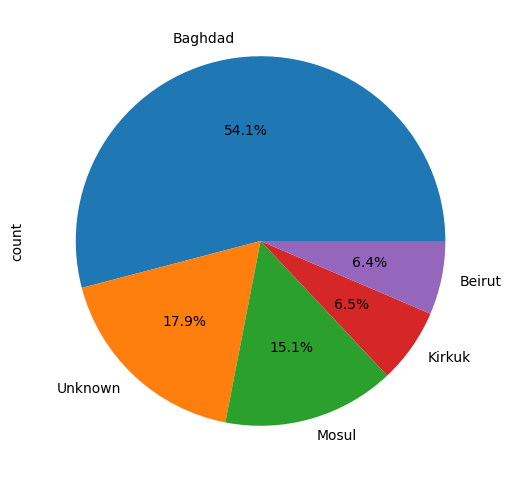

In [54]:
top5_country=Mid_Nor['city'].value_counts()[:5]
top5_country.dropna()
top5_country.plot(kind='pie',autopct="%1.1f%%",figsize=(6,6))

<ipython-input-55-4cb8715c01b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Group', data=top_30_Group, palette='vlag', order=top_30_Group.Group.value_counts().index, edgecolor=sns.color_palette('dark', 7))


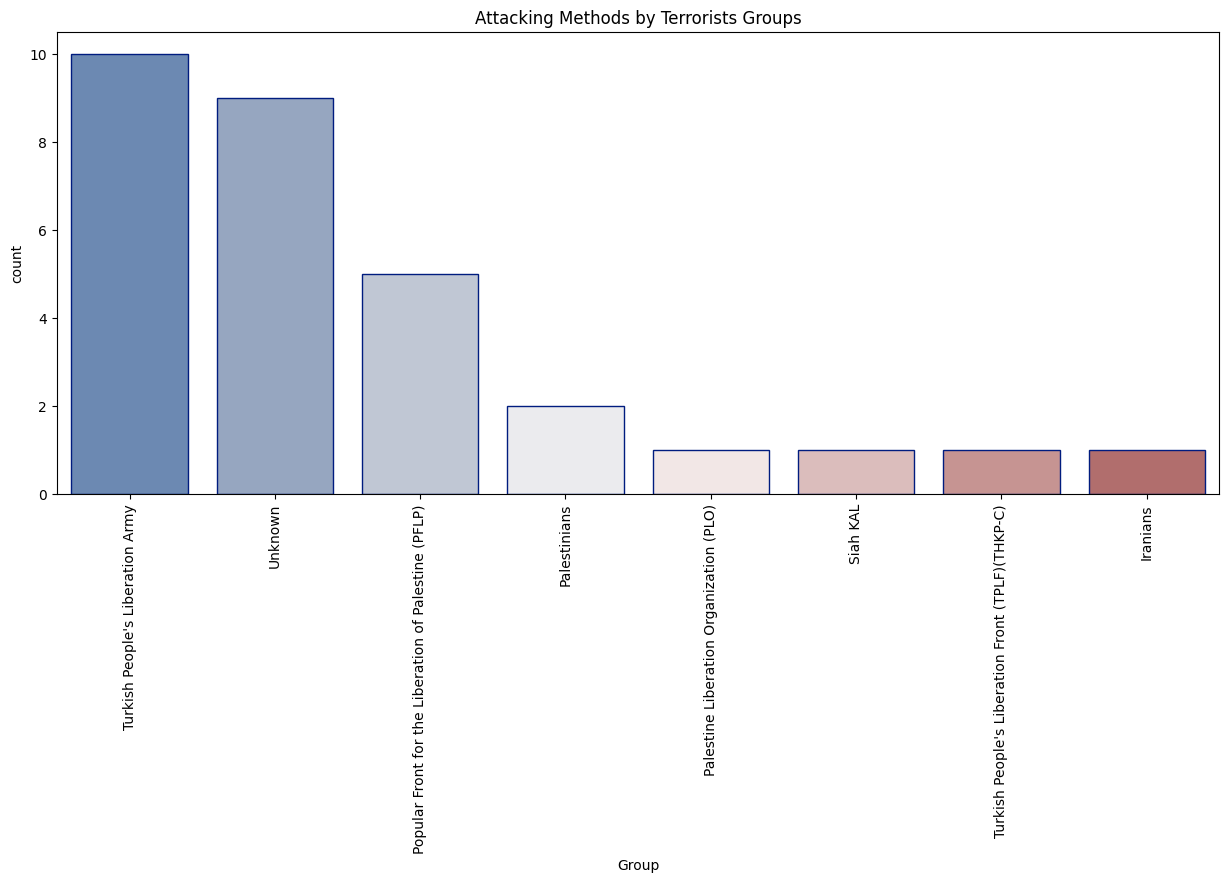

In [55]:
top_30_Group=Mid_Nor.head(30)
plt.subplots(figsize=(15,6))
sns.countplot(x='Group', data=top_30_Group, palette='vlag', order=top_30_Group.Group.value_counts().index, edgecolor=sns.color_palette('dark', 7))

plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists Groups')
plt.show()

<ipython-input-56-a53df0ae44b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'AttackType',data=top_30_Att,palette='vlag',order=top_30_Att.AttackType.value_counts().index,edgecolor=sns.color_palette('dark',7))


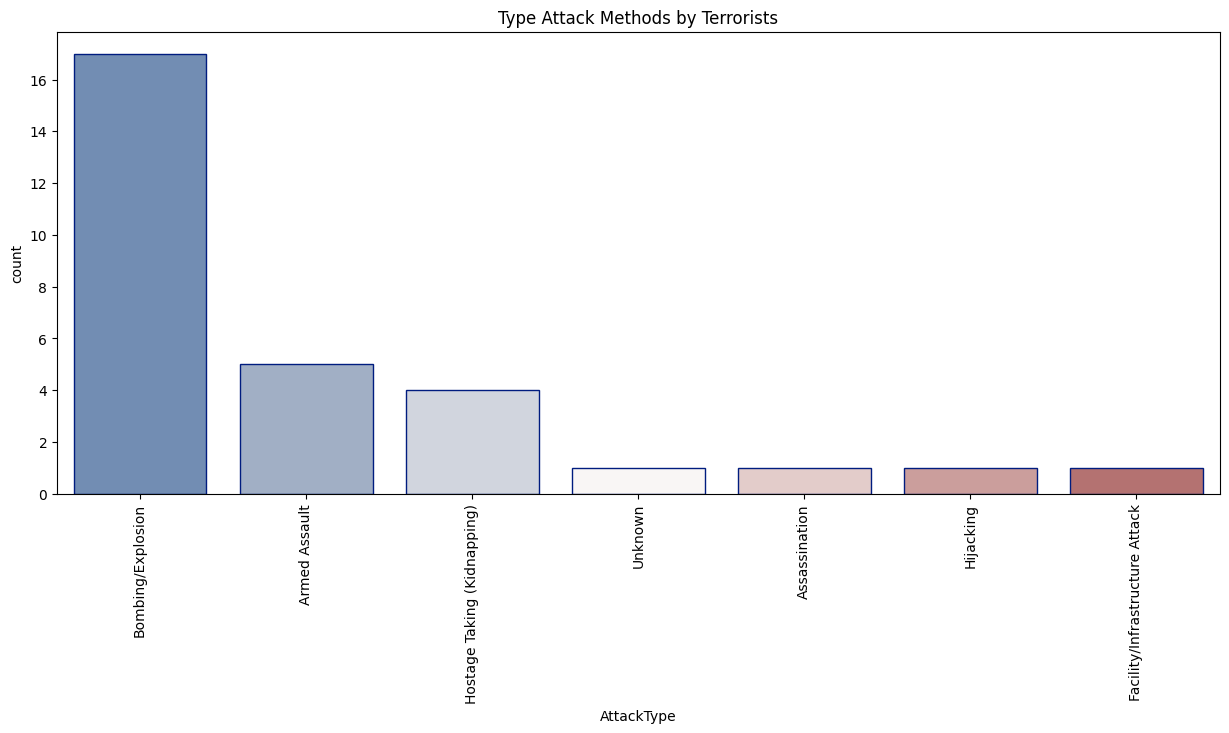

In [56]:
top_30_Att=Mid_Nor.head(30)
plt.subplots(figsize=(15,6))
sns.countplot(x = 'AttackType',data=top_30_Att,palette='vlag',order=top_30_Att.AttackType.value_counts().index,edgecolor=sns.color_palette('dark',7))

plt.xticks(rotation=90)
plt.title('Type Attack Methods by Terrorists')
plt.show()


<ipython-input-57-78209e405738>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Killed',data=top_30_kill,palette='vlag',order=top_30_kill.Killed.value_counts().index,edgecolor=sns.color_palette('dark',7))


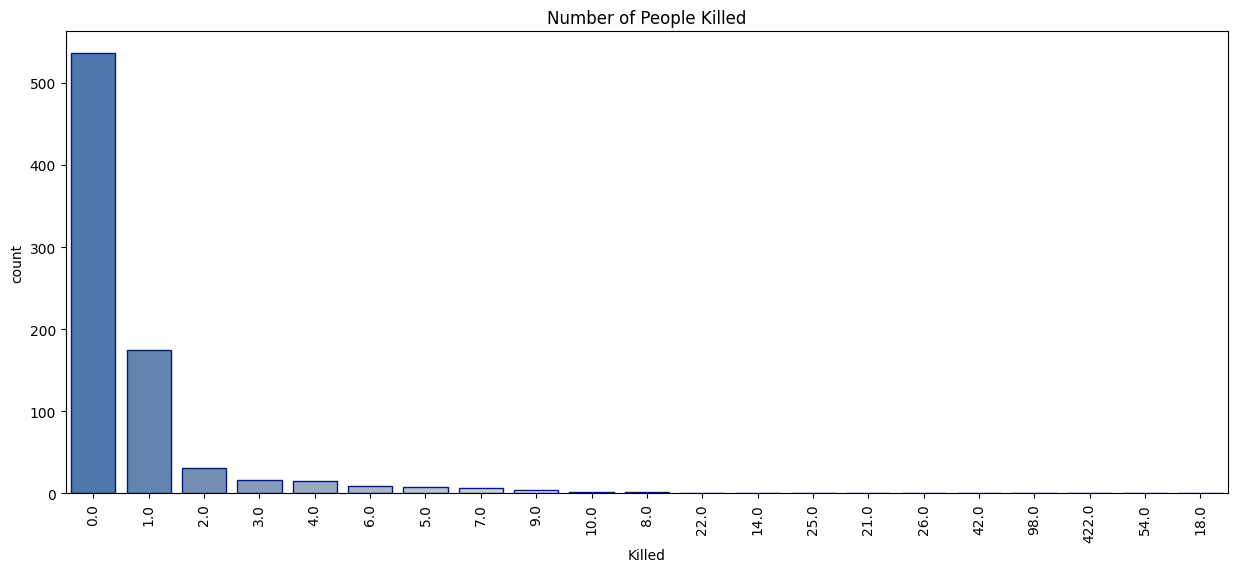

In [57]:
top_30_kill=Mid_Nor.head(1000)
plt.subplots(figsize=(15,6))
sns.countplot(x='Killed',data=top_30_kill,palette='vlag',order=top_30_kill.Killed.value_counts().index,edgecolor=sns.color_palette('dark',7))

plt.xticks(rotation=90)
plt.title('Number of People Killed')
plt.show()

<ipython-input-58-9eb78fe37b73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target_type',data=Mid_Nor,palette='vlag',order=Mid_Nor.Target_type.value_counts().index,edgecolor=sns.color_palette('dark',7))


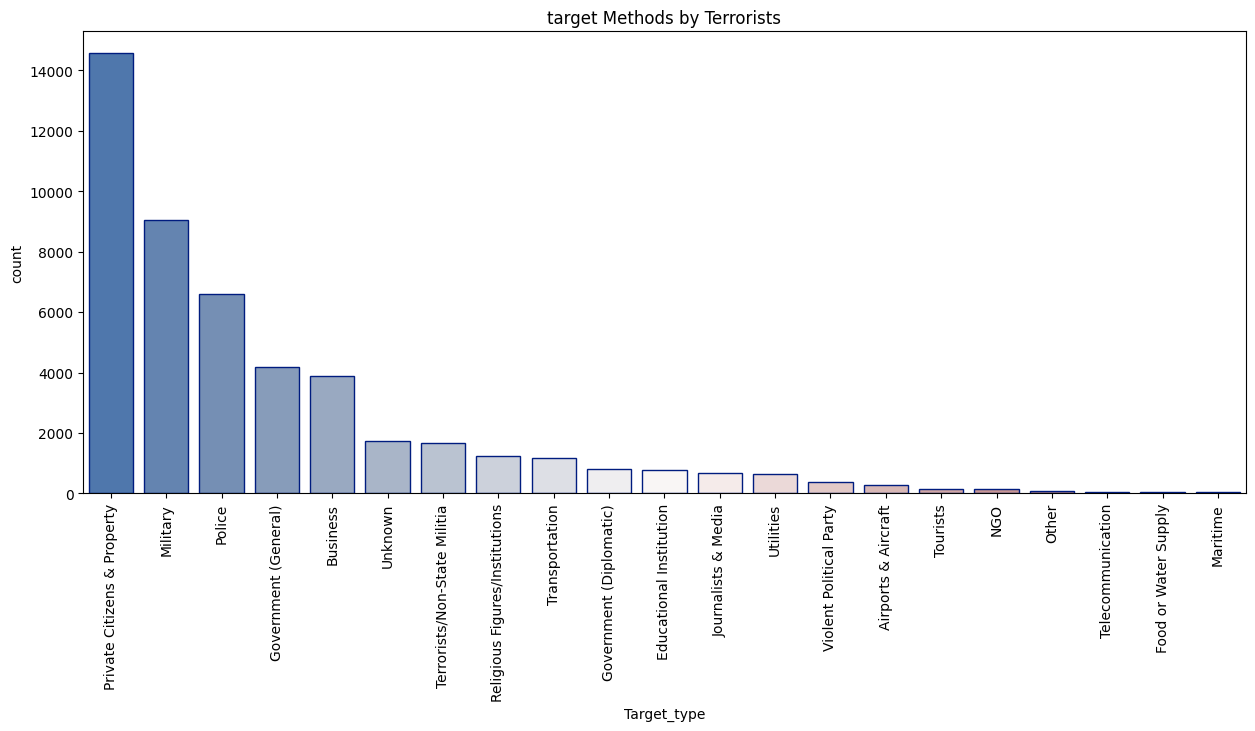

In [58]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Target_type',data=Mid_Nor,palette='vlag',order=Mid_Nor.Target_type.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('target Methods by Terrorists')
plt.show()

<ipython-input-59-720f7fd82a14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weapon_type',data=Mid_Nor,palette='vlag',order=Mid_Nor.Weapon_type.value_counts().index,edgecolor=sns.color_palette('dark',7))


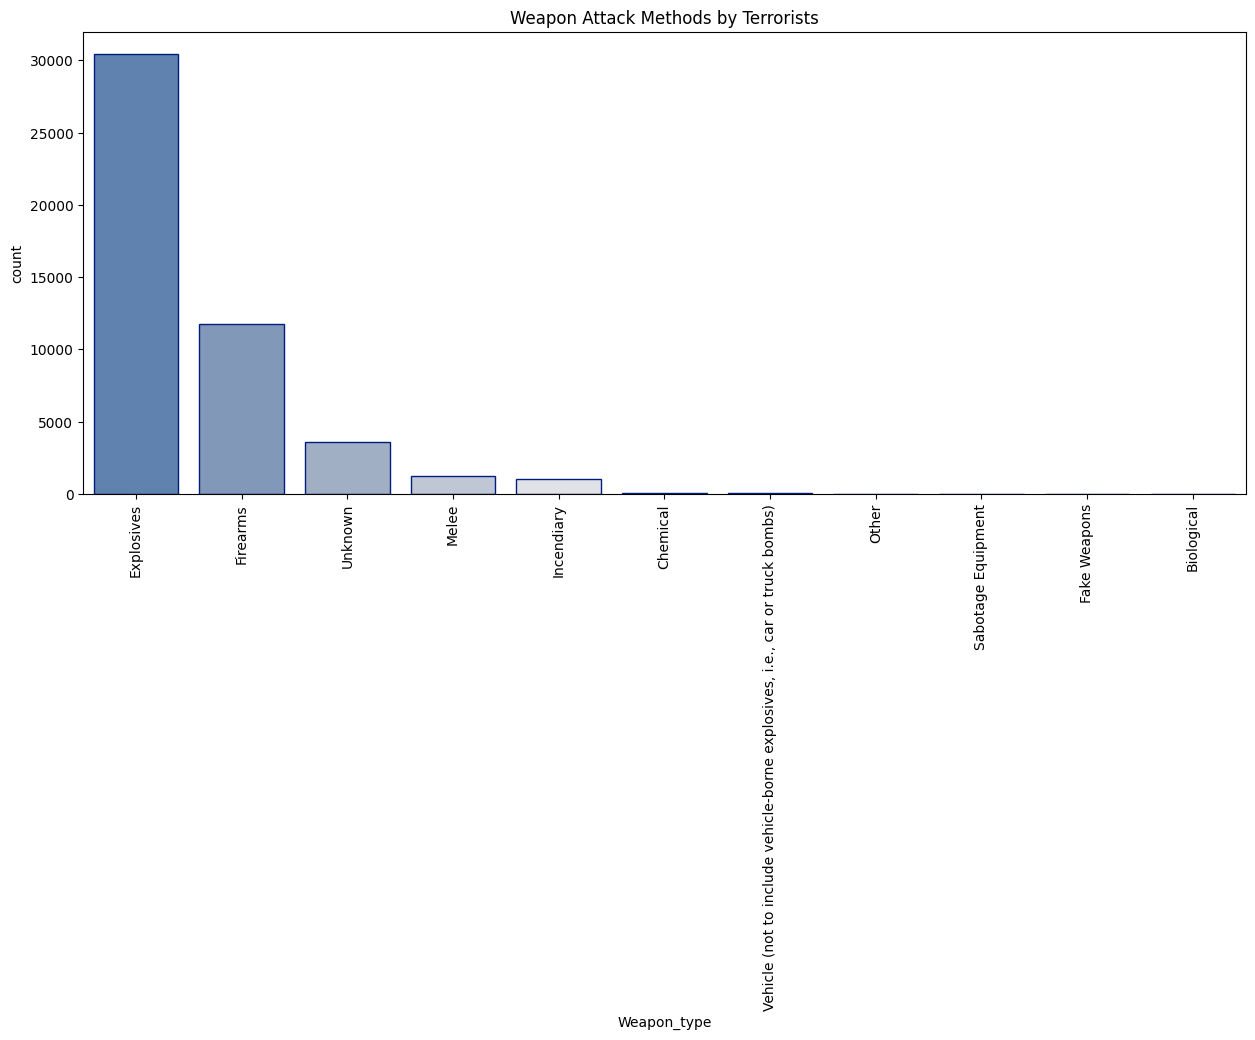

In [59]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Weapon_type',data=Mid_Nor,palette='vlag',order=Mid_Nor.Weapon_type.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Weapon Attack Methods by Terrorists')
plt.show()

<ipython-input-60-6cc4829dd825>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='casualities',data=Mid_Nor,palette='vlag',order=top_100_casu.casualities.value_counts().index,edgecolor=sns.color_palette('dark',7))


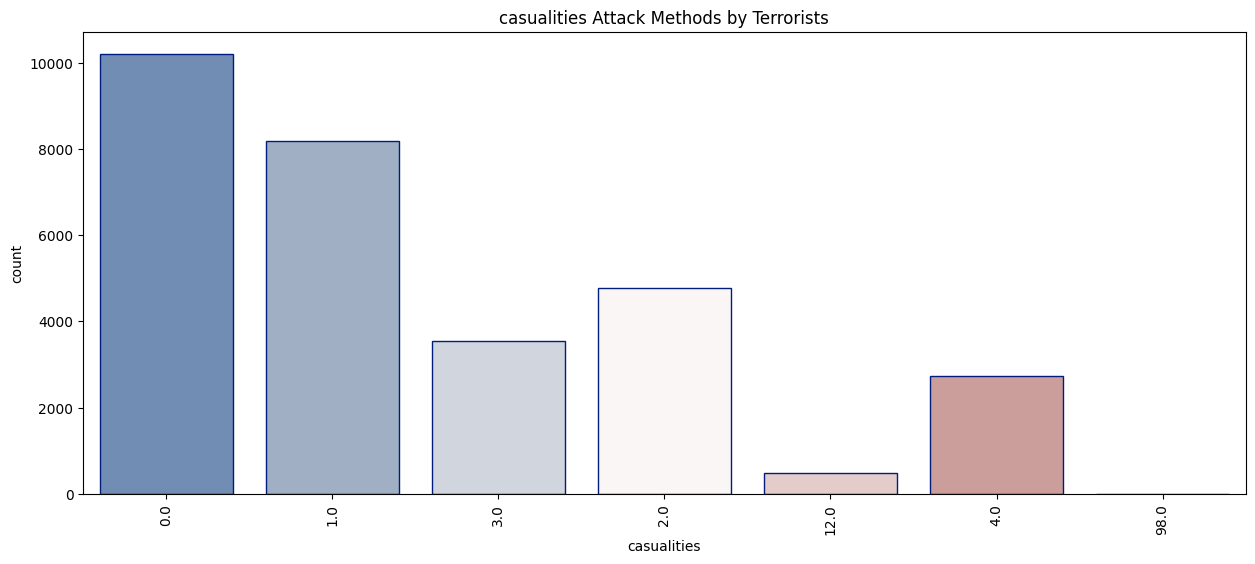

In [60]:
top_100_casu=Mid_Nor.head(100)
plt.subplots(figsize=(15,6))
sns.countplot(x='casualities',data=Mid_Nor,palette='vlag',order=top_100_casu.casualities.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('casualities Attack Methods by Terrorists')
plt.show()

In [61]:
number_of_affected = Mid_Nor[['Country','Killed','Wounded','casualities']]
number_of_affected = number_of_affected.groupby(by=['Country']).sum().reset_index().sort_values(by=['casualities'], ascending = False)
number_of_affected.head(10)

,Country,Killed,Wounded,casualities
5,Iraq,78138.0,133976.0,201915.0
16,Syria,14885.0,13925.0,21334.0
0,Algeria,10887.0,8994.0,18961.0
18,Turkey,6870.0,9876.0,16653.0
22,Yemen,8609.0,9038.0,15857.0
9,Lebanon,4029.0,10876.0,14705.0
6,Israel,1703.0,7914.0,9394.0
2,Egypt,3800.0,4761.0,8525.0
4,Iran,1673.0,4029.0,5623.0
10,Libya,2592.0,3310.0,5501.0


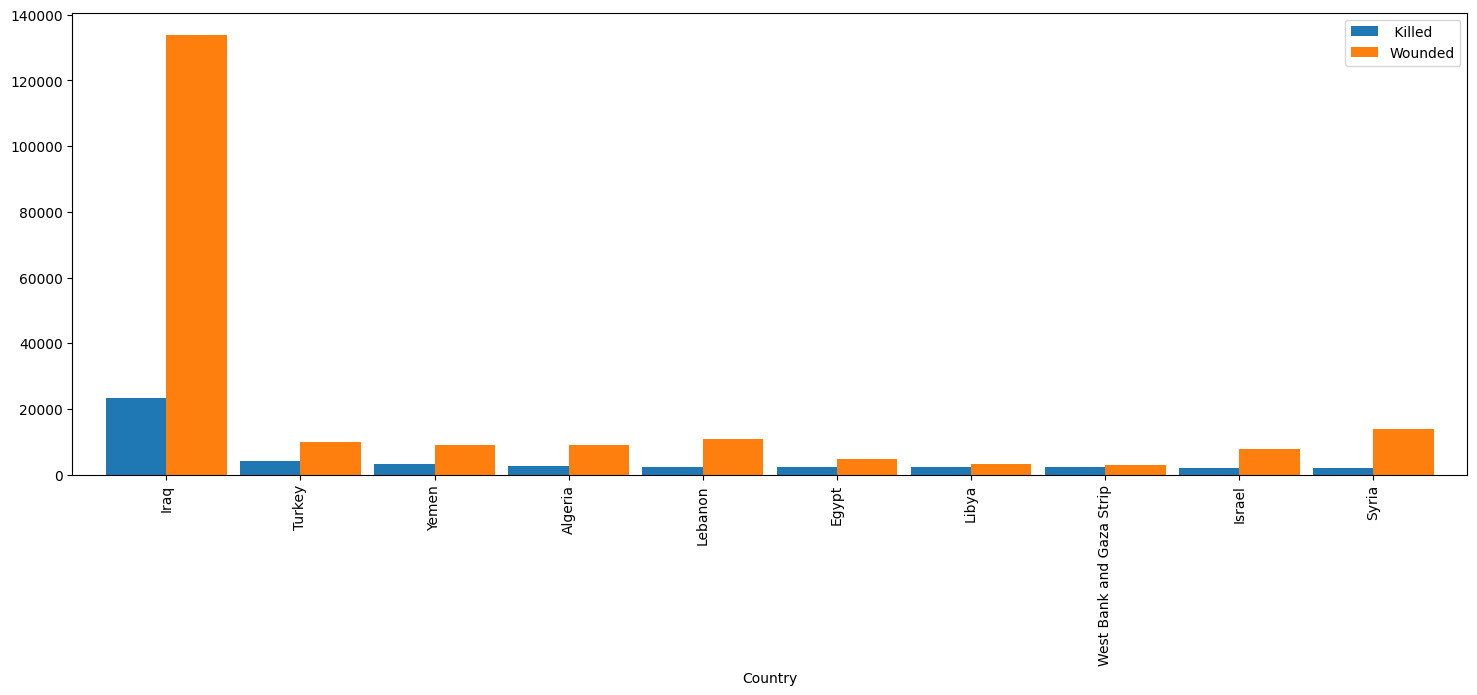

In [62]:
count_terror=Mid_Nor['Country'].value_counts()[:10].to_frame()
count_terror.columns=[' Killed ']
count_kill=Mid_Nor.groupby('Country')['Wounded'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

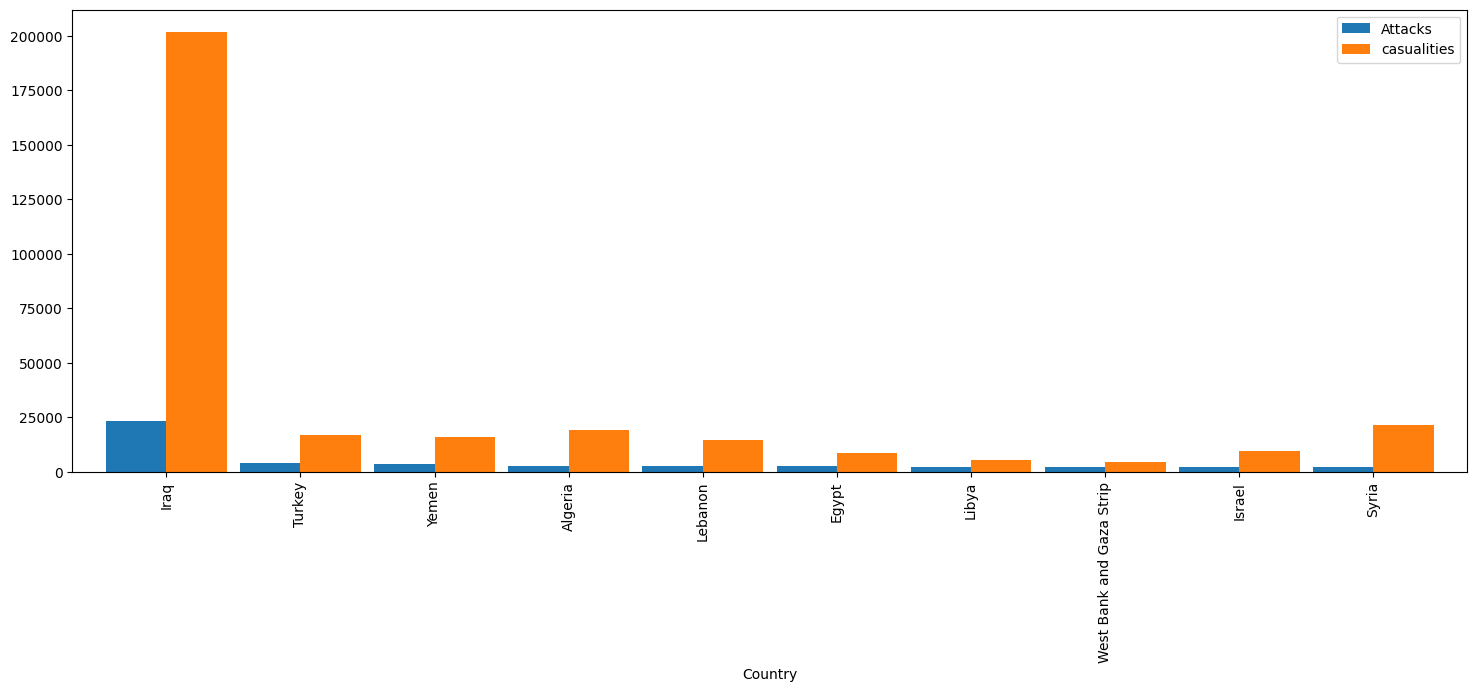

In [63]:
count_terror=Mid_Nor['Country'].value_counts()[:10].to_frame()
count_terror.columns=['Attacks']
count_kill=Mid_Nor.groupby('Country')['casualities'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()


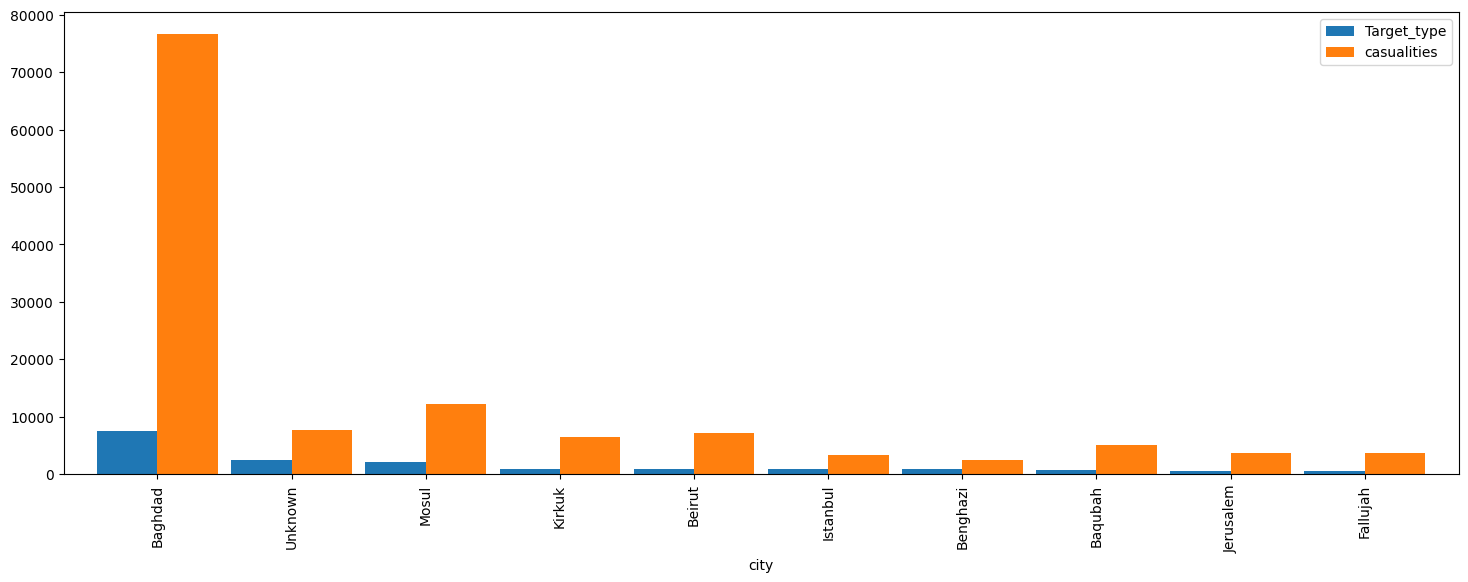

In [64]:
count_terror=Mid_Nor['city'].value_counts()[:10].to_frame()
count_terror.columns=['Target_type']
count_kill=Mid_Nor.groupby('city')['casualities'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [65]:
group_killed= Mid_Nor[['Group','Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(15)
group_killed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Unknown to Muslim extremists
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Killed  15 non-null     float64
dtypes: float64(1)
memory usage: 240.0+ bytes


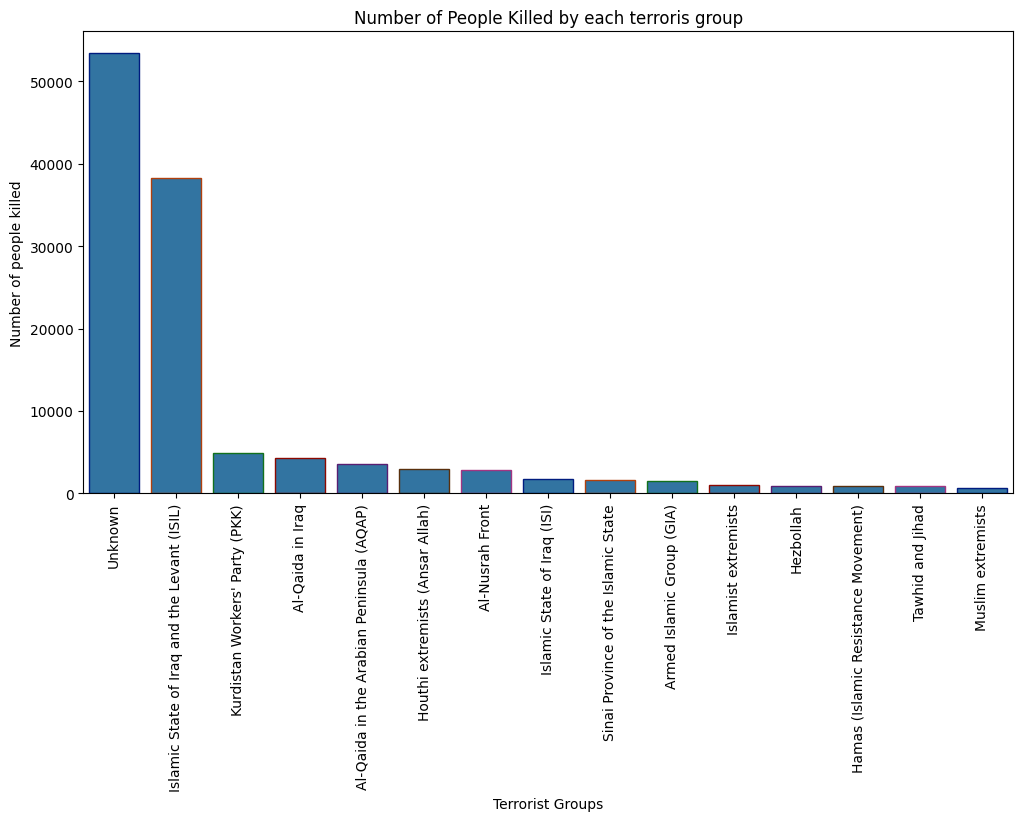

In [66]:
plt.subplots(figsize=(12,6))
sns.barplot(x=group_killed.index, y=group_killed.Killed, edgecolor=sns.color_palette('dark',7))
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

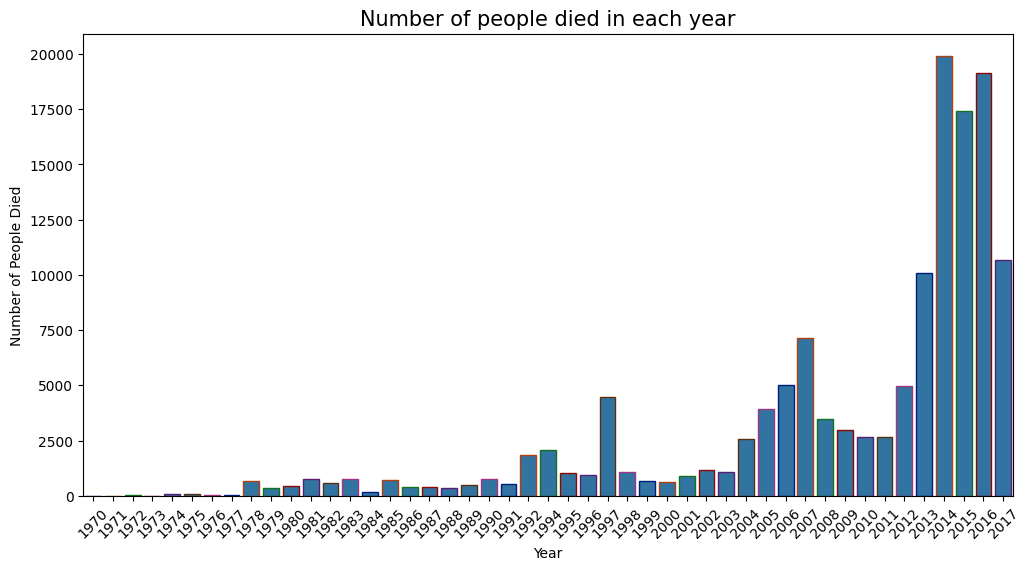

In [67]:
died_people = Mid_Nor[['Year','Killed']].groupby(['Year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(x=died_people.index, y=died_people.Killed.values,edgecolor=sns.color_palette('dark',7))

plt.title("Number of people died in each year",fontsize=15)
plt.ylabel("Number of People Died")
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.show()

<ipython-input-68-012693cd659b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='latitude',data=top_30_lat,palette='vlag',order=top_30_lat.latitude.value_counts().index,edgecolor=sns.color_palette('dark',7))


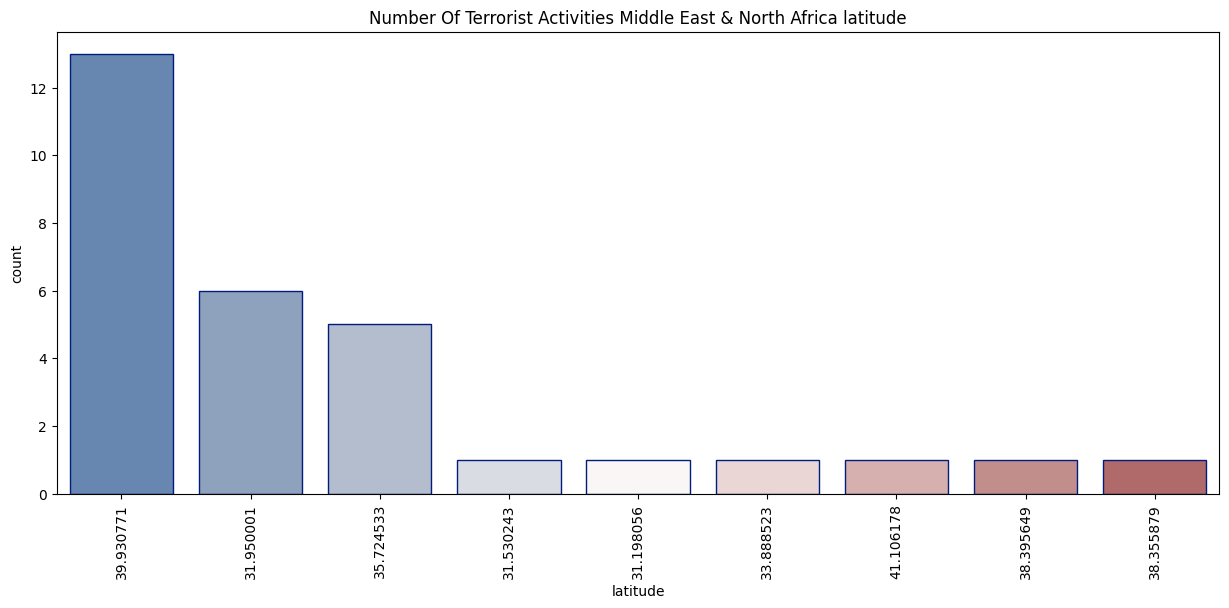

In [68]:
top_30_lat=Mid_Nor.head(30)
plt.subplots(figsize=(15,6))
sns.countplot(x='latitude',data=top_30_lat,palette='vlag',order=top_30_lat.latitude.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa latitude')
plt.show()

<ipython-input-69-f616ad4632a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='longitude',data=top_30_longitude,palette='vlag',order=top_30_longitude.longitude.value_counts().index,edgecolor=sns.color_palette('dark',7))


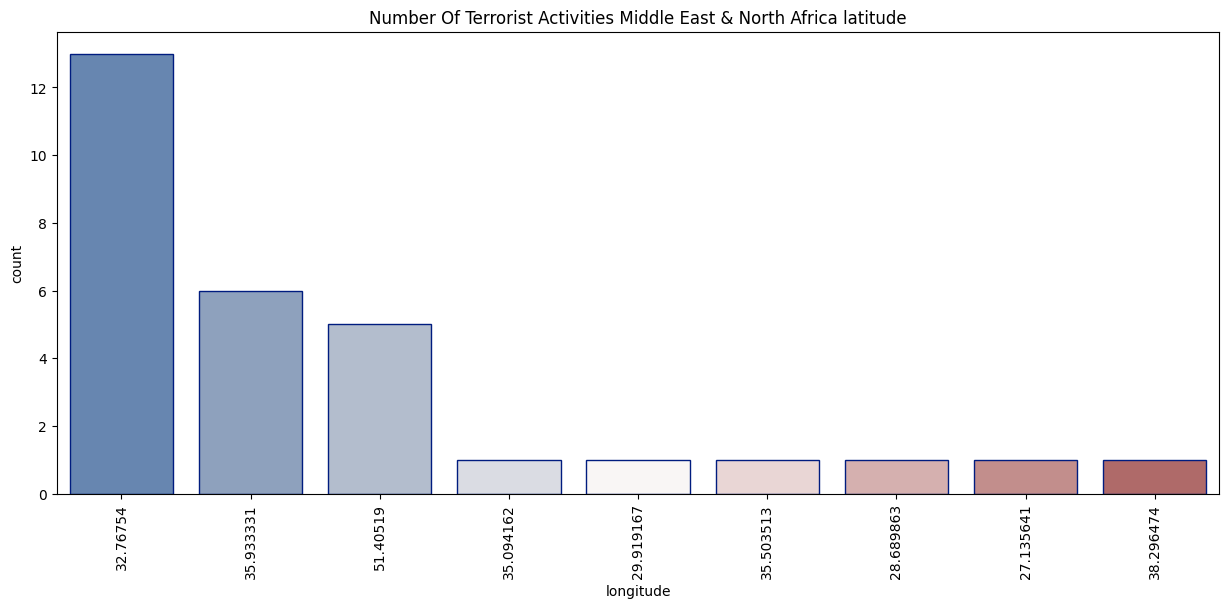

In [69]:
top_30_longitude=Mid_Nor.head(30)
plt.subplots(figsize=(15,6))
sns.countplot(x='longitude',data=top_30_longitude,palette='vlag',order=top_30_longitude.longitude.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Middle East & North Africa latitude')
plt.show()